In [234]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv("../../personal-dev/ml/Machine-Learning-With-Python/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [236]:
df["ChestPain"].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [237]:
df["Thal"].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [238]:
df = df.dropna()

In [239]:
df["ChestPainx"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thalx"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPainx,Thalx
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,1,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,2,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,2,3
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,3,2
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,4,2


In [240]:
df = df.drop(columns=["Unnamed: 0","ChestPain", "Thal"])

In [241]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPainx,Thalx
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,1,1
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,2,2
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,2,3
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,3,2
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,4,2


In [242]:
y = df["AHD"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [243]:
X = df.drop(columns=["AHD"])
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPainx,Thalx
0,63,1,145,233,1,2,150,0,2.3,3,0.0,1,1
1,67,1,160,286,0,2,108,1,1.5,2,3.0,2,2
2,67,1,120,229,0,2,129,1,2.6,2,2.0,2,3
3,37,1,130,250,0,0,187,0,3.5,3,0.0,3,2
4,41,0,130,204,0,2,172,0,1.4,1,0.0,4,2


In [244]:
X = pd.concat([pd.Series(1, X.index, name="00"), X], axis=1)

In [245]:
X.head()

,00,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPainx,Thalx
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,1,1
1,1,67,1,160,286,0,2,108,1,1.5,2,3.0,2,2
2,1,67,1,120,229,0,2,129,1,2.6,2,2.0,2,3
3,1,37,1,130,250,0,0,187,0,3.5,3,0.0,3,2
4,1,41,0,130,204,0,2,172,0,1.4,1,0.0,4,2


In [246]:
def hypothesis(theta, X):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

In [247]:
def costFunc(theta, X , y):
    y1 = hypothesis(theta, X)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [248]:
def gradientDescent(theta, X, y, alpha, epoch):
    m = len(X)
    J = [costFunc(theta, X, y)]
    i = 0
    while i < epoch:
        h = hypothesis(theta, X)
        for c in range(0,len(X.columns)):
            theta[c]-= (alpha/m) * np.sum((h-y)*X.iloc[:, c])
        J.append(costFunc(theta, X, y))
        i+=1
    return J, theta

In [249]:
def predict(theta, X, y, alpha, epoch) :
    J, th = gradientDescent(theta, X, y, alpha, epoch)
    y_pred = hypothesis(th, X)
    for i in range(len(y_pred)):
        y_pred[i] = 1 if y_pred[i] >= 0.5 else 0
    y = list(y)
    acc = np.sum([y[i]==y_pred[i] for i in range(len(y))])/len(y)
    return J, acc

In [253]:
theta = [0.3]*len(X.columns)
J, acc = predict(theta, X, y , 0.0001, 25000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [254]:
acc

0.8114478114478114

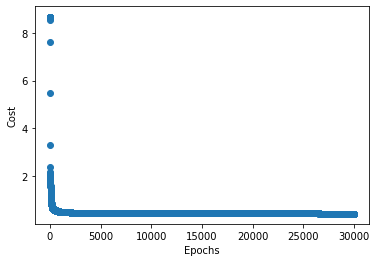

In [255]:
plt.figure()
plt.scatter(list(range(0, len(J))), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()